In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv(r'C:\Users\jaiad\OneDrive\Desktop\AI Job Market Disruption Tracker\Techlayoffs.csv')

In [5]:
df.head()

,Company,Location HQ,# Laid Off,Date,%,Industry,Source,Stage,$ Raised (mm),Country,Date Added
0,Business Insider,New York City,NaN,5/29/2025,20%,Media,https://www.adweek.com/media/business-insider-...,Acquired,$56,United States,06-02-2025
1,eBay,"Tel Aviv,Non-U.S.",200.0,5/28/2025,NaN,Retail,https://www.calcalistech.com/ctechnews/article...,Post-IPO,$1200,Israel,06-02-2025
2,Cars24,"Gurugram,Non-U.S.",120.0,5/27/2025,NaN,Transportation,https://inc42.com/buzz/cars24-to-fire-120-more...,Series G,$1300,India,5/28/2025
3,nCino,Wilmington,NaN,5/27/2025,7%,Finance,https://www.housingwire.com/articles/ncino-wor...,Post-IPO,$1100,United States,5/29/2025
4,Otipy,"New Delhi,Non-U.S.",300.0,5/23/2025,100%,Food,https://economictimes.indiatimes.com/tech/star...,Series B,$44,India,5/27/2025


In [6]:
cols_to_drop = ['Date Added']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

In [7]:
df.head()

,Company,Location HQ,# Laid Off,Date,%,Industry,Source,Stage,$ Raised (mm),Country
0,Business Insider,New York City,NaN,5/29/2025,20%,Media,https://www.adweek.com/media/business-insider-...,Acquired,$56,United States
1,eBay,"Tel Aviv,Non-U.S.",200.0,5/28/2025,NaN,Retail,https://www.calcalistech.com/ctechnews/article...,Post-IPO,$1200,Israel
2,Cars24,"Gurugram,Non-U.S.",120.0,5/27/2025,NaN,Transportation,https://inc42.com/buzz/cars24-to-fire-120-more...,Series G,$1300,India
3,nCino,Wilmington,NaN,5/27/2025,7%,Finance,https://www.housingwire.com/articles/ncino-wor...,Post-IPO,$1100,United States
4,Otipy,"New Delhi,Non-U.S.",300.0,5/23/2025,100%,Food,https://economictimes.indiatimes.com/tech/star...,Series B,$44,India


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4078 entries, 0 to 4077
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        4078 non-null   object 
 1   Location HQ    4077 non-null   object 
 2   # Laid Off     2660 non-null   float64
 3   Date           4078 non-null   object 
 4   %              2594 non-null   object 
 5   Industry       4077 non-null   object 
 6   Source         4075 non-null   object 
 7   Stage          4071 non-null   object 
 8   $ Raised (mm)  3631 non-null   object 
 9   Country        4078 non-null   object 
dtypes: float64(1), object(9)
memory usage: 318.7+ KB


In [9]:
# Rename columns
df.rename(columns={
    'Location HQ': 'HQ_Location',
    '# Laid Off': 'Num_Laid_Off',
    'Date': 'Layoff_Date',
    '%': 'Percent_Laid_Off',
    'Stage': 'Company_Stage',
    '$ Raised (mm)': 'Funding_Raised_Millions'
}, inplace=True)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4078 entries, 0 to 4077
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company                  4078 non-null   object 
 1   HQ_Location              4077 non-null   object 
 2   Num_Laid_Off             2660 non-null   float64
 3   Layoff_Date              4078 non-null   object 
 4   Percent_Laid_Off         2594 non-null   object 
 5   Industry                 4077 non-null   object 
 6   Source                   4075 non-null   object 
 7   Company_Stage            4071 non-null   object 
 8   Funding_Raised_Millions  3631 non-null   object 
 9   Country                  4078 non-null   object 
dtypes: float64(1), object(9)
memory usage: 318.7+ KB


In [11]:
df.value_counts().sum()

1668

***HANDLING NULL VALUES***

In [12]:
df.isnull().sum()

Company                       0
HQ_Location                   1
Num_Laid_Off               1418
Layoff_Date                   0
Percent_Laid_Off           1484
Industry                      1
Source                        3
Company_Stage                 7
Funding_Raised_Millions     447
Country                       0
dtype: int64

In [13]:
# Fill categorical/text nulls
df['HQ_Location'].fillna('Unknown', inplace=True)
df['Industry'].fillna('Other', inplace=True)
df['Company_Stage'].fillna('Unknown', inplace=True)

C:\Users\jaiad\AppData\Local\Temp\ipykernel_7592\2440297184.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HQ_Location'].fillna('Unknown', inplace=True)
C:\Users\jaiad\AppData\Local\Temp\ipykernel_7592\2440297184.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [14]:
#Date conversion
df['Layoff_Date'] = pd.to_datetime(df['Layoff_Date'], errors='coerce')

In [15]:
df.isnull().sum()

Company                       0
HQ_Location                   0
Num_Laid_Off               1418
Layoff_Date                1751
Percent_Laid_Off           1484
Industry                      0
Source                        3
Company_Stage                 0
Funding_Raised_Millions     447
Country                       0
dtype: int64

In [16]:
# Drop rows where both 'Num_Laid_Off' and 'Percent_Laid_Off' are missing,
# since neither value can contribute meaningful insight or estimation.
df = df[~(df['Num_Laid_Off'].isnull() & df['Percent_Laid_Off'].isnull())]

In [17]:
df.isnull().sum()

Company                       0
HQ_Location                   0
Num_Laid_Off                749
Layoff_Date                1467
Percent_Laid_Off            815
Industry                      0
Source                        0
Company_Stage                 0
Funding_Raised_Millions     354
Country                       0
dtype: int64

In [18]:
df['Num_Laid_Off'].fillna(0, inplace=True)
df['Percent_Laid_Off'].fillna('0', inplace=True)  # use string '0' if column is of object type

C:\Users\jaiad\AppData\Local\Temp\ipykernel_7592\3054971808.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Num_Laid_Off'].fillna(0, inplace=True)
C:\Users\jaiad\AppData\Local\Temp\ipykernel_7592\3054971808.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [19]:
df.isnull().sum()

Company                       0
HQ_Location                   0
Num_Laid_Off                  0
Layoff_Date                1467
Percent_Laid_Off              0
Industry                      0
Source                        0
Company_Stage                 0
Funding_Raised_Millions     354
Country                       0
dtype: int64

In [20]:
#'Funding_Raised_Millions' values cleaning there are some symbols in it so removing it so that we can convert it to float
df['Funding_Raised_Millions'] = df['Funding_Raised_Millions'].replace({'\$': '', ',': ''}, regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\jaiad\AppData\Local\Temp\ipykernel_7592\1212674695.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['Funding_Raised_Millions'] = df['Funding_Raised_Millions'].replace({'\$': '', ',': ''}, regex=True).astype(float)


Skewness of Funding_Raised_Millions: 20.43


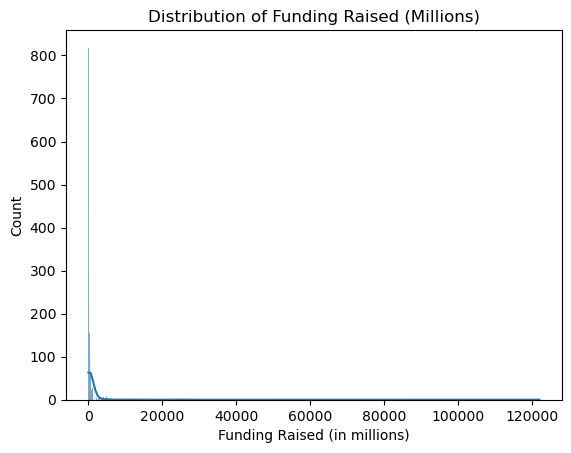

In [21]:
#Funding_Raised_Millions handling it using Median imputation but before that we need to check its skewness bsed on it we can impute it
skew_value = df['Funding_Raised_Millions'].skew()
print(f"Skewness of Funding_Raised_Millions: {skew_value:.2f}")
#Visualizing it 
sns.histplot(df['Funding_Raised_Millions'], kde=True)
plt.title("Distribution of Funding Raised (Millions)")
plt.xlabel("Funding Raised (in millions)")
plt.show()


In the above plot we can see that the data is Right skewed in order to overcome we apply log transformation and then we Check for the median 

In [22]:
df['Log_Funding_Raised'] = np.log1p(df['Funding_Raised_Millions'])

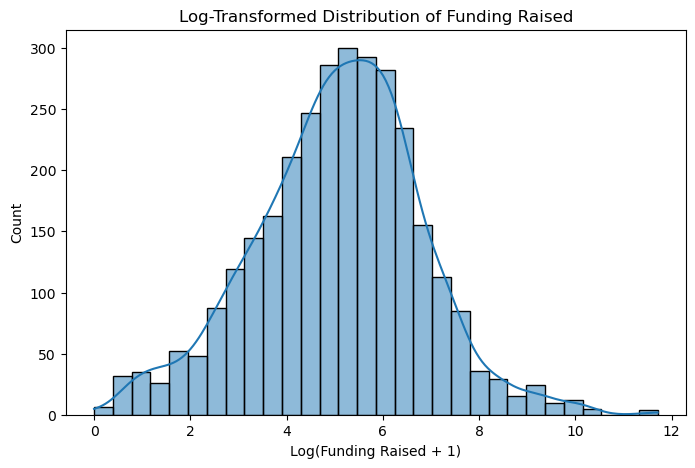

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(df['Log_Funding_Raised'], kde=True, bins=30)
plt.title("Log-Transformed Distribution of Funding Raised")
plt.xlabel("Log(Funding Raised + 1)")
plt.ylabel("Count")
plt.show()

Above plot is after applying Log transformation nearly normal (bell-shaped) we can use Median as there is a slight Skewness

In [24]:
#Deleting the Funding_Raised_Millions column as we have already created a new column with log transformation
df.drop(columns=['Funding_Raised_Millions'], inplace=True)

In [25]:
#Renaming Log_Funding_Raised to Funding_Raised_Millions
df.rename(columns={'Log_Funding_Raised': 'Funding_Raised_Millions'}, inplace=True)

In [26]:
#Applying Median Imputation
median_log_value = df['Funding_Raised_Millions'].median()
df['Funding_Raised_Millions'].fillna(median_log_value, inplace=True)

C:\Users\jaiad\AppData\Local\Temp\ipykernel_7592\3799959700.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Funding_Raised_Millions'].fillna(median_log_value, inplace=True)


In [27]:
df.isnull().sum()

Company                       0
HQ_Location                   0
Num_Laid_Off                  0
Layoff_Date                1467
Percent_Laid_Off              0
Industry                      0
Source                        0
Company_Stage                 0
Country                       0
Funding_Raised_Millions       0
dtype: int64

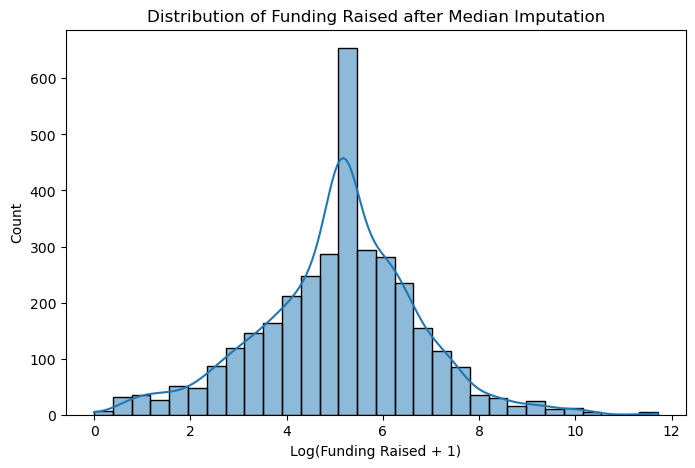

In [28]:
plt.figure(figsize=(8,5))
sns.histplot(df['Funding_Raised_Millions'], kde=True, bins=30)
plt.title("Distribution of Funding Raised after Median Imputation")
plt.xlabel("Log(Funding Raised + 1)")
plt.ylabel("Count")
plt.show()

***HANDLING OUTLIERS***

In this Datapoints we have to find for the Outliers we start with  Funding_Raised_Millions   we check it using Boxplot and use Appropriate methods to handle the Outliers 

Z-Score -Can be used for Normal Distribution
IQR(Inter quatrtile Rannge) - SFor skewed data 

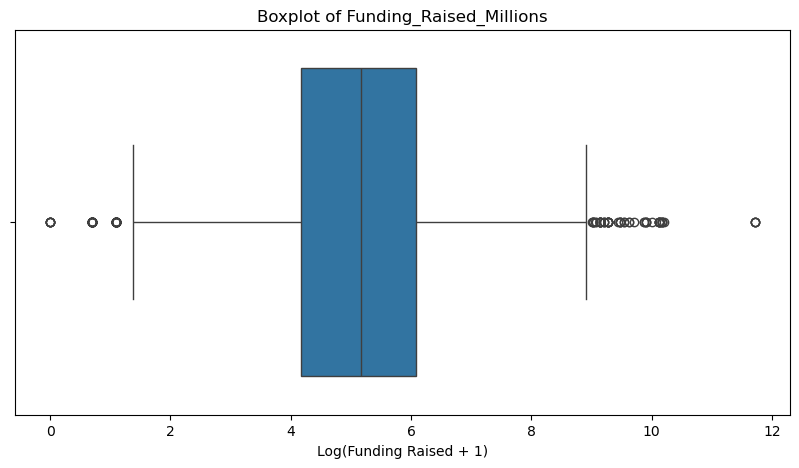

In [29]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Funding_Raised_Millions'])
plt.title('Boxplot of Funding_Raised_Millions')
plt.xlabel('Log(Funding Raised + 1)')
plt.show()

In [30]:
Q1 = df['Funding_Raised_Millions'].quantile(0.25)
Q3 = df['Funding_Raised_Millions'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['Funding_Raised_Millions'] >= lower_bound) & 
                    (df['Funding_Raised_Millions'] <= upper_bound)]

print("Original rows:", len(df))
print("Rows after outlier removal:", len(df_no_outliers))
print("Outliers removed:", len(df) - len(df_no_outliers))


Original rows: 3409
Rows after outlier removal: 3281
Outliers removed: 128


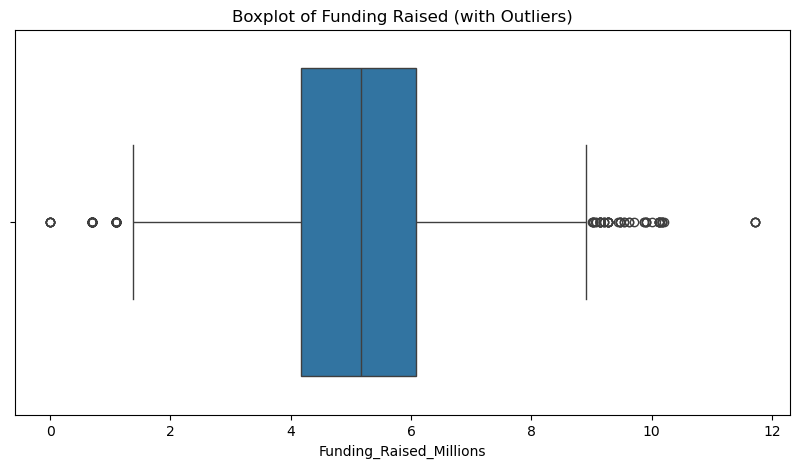

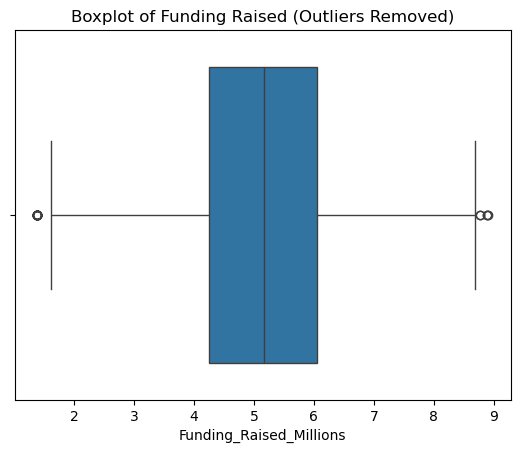

In [31]:
# Boxplot before removing outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Funding_Raised_Millions'])
plt.title('Boxplot of Funding Raised (with Outliers)')
plt.xlabel('Funding_Raised_Millions')
plt.show()

# Boxplot after removing outliers
# plt.figure(figsize=(10, 5))
sns.boxplot(x=df_no_outliers['Funding_Raised_Millions'])
plt.title('Boxplot of Funding Raised (Outliers Removed)')
plt.xlabel('Funding_Raised_Millions')
plt.show()


In [32]:
print("Original rows:", len(df))
print("Rows after outlier removal:", len(df_no_outliers))
print("Outliers removed:", len(df) - len(df_no_outliers))


Original rows: 3409
Rows after outlier removal: 3281
Outliers removed: 128


Handling Outliers for the Column 

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3409 entries, 0 to 4077
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Company                  3409 non-null   object        
 1   HQ_Location              3409 non-null   object        
 2   Num_Laid_Off             3409 non-null   float64       
 3   Layoff_Date              1942 non-null   datetime64[ns]
 4   Percent_Laid_Off         3409 non-null   object        
 5   Industry                 3409 non-null   object        
 6   Source                   3409 non-null   object        
 7   Company_Stage            3409 non-null   object        
 8   Country                  3409 non-null   object        
 9   Funding_Raised_Millions  3409 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 293.0+ KB


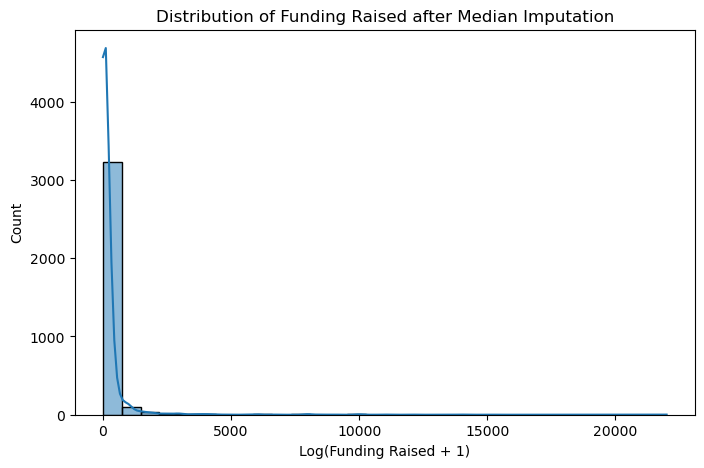

In [34]:
plt.figure(figsize=(8,5))
sns.histplot(df['Num_Laid_Off'], kde=True, bins=30)
plt.title("Distribution of Funding Raised after Median Imputation")
plt.xlabel("Log(Funding Raised + 1)")
plt.ylabel("Count")
plt.show()

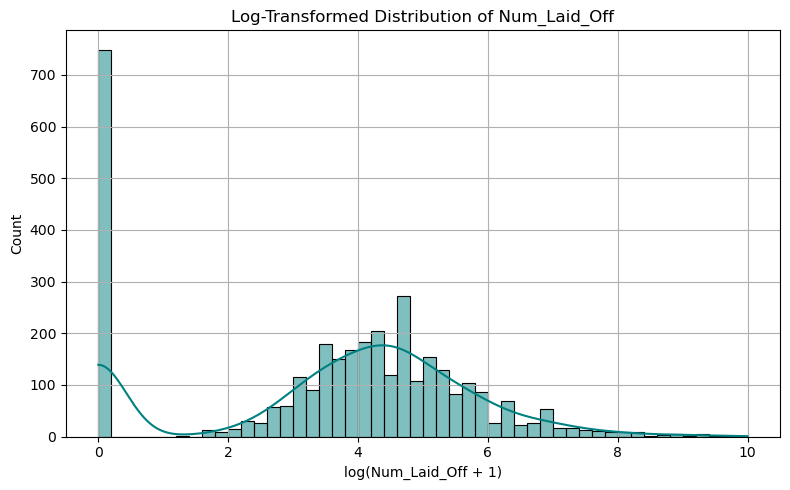

In [35]:


# Step 1: Apply log1p transformation
df['Num_Laid_Off_Log'] = np.log1p(df['Num_Laid_Off'])

# Step 2: Visualize the transformed distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Num_Laid_Off_Log'], bins=50, kde=True, color='teal')
plt.title('Log-Transformed Distribution of Num_Laid_Off')
plt.xlabel('log(Num_Laid_Off + 1)')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()


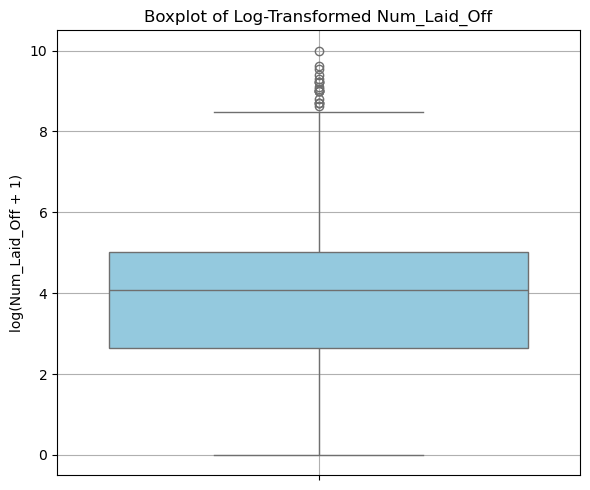

In [36]:
# Step 3: Boxplot of the transformed data
plt.figure(figsize=(6, 5))
sns.boxplot(y=df['Num_Laid_Off_Log'], color='skyblue')
plt.title('Boxplot of Log-Transformed Num_Laid_Off')
plt.ylabel('log(Num_Laid_Off + 1)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [37]:
# Capping is applied to the log-transformed Num_Laid_Off variable to handle extreme outliers without removing data This method preserves the distribution shape while limiting the 
# influence of extreme values by replacing them with upper and lower bounds derived from the interquartile range (IQR).

In [38]:
# Step 1: Calculate IQR bounds
Q1 = df['Num_Laid_Off_Log'].quantile(0.25)
Q3 = df['Num_Laid_Off_Log'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 2: Cap the outliers
df['Num_Laid_Off_Log_Capped'] = df['Num_Laid_Off_Log'].clip(lower=lower_bound, upper=upper_bound)


In [39]:
# Drop the columns
df.drop(['Num_Laid_Off_Log', 'Num_Laid_Off'], axis=1, inplace=True)

In [40]:
# Rename the column
df.rename(columns={'Num_Laid_Off_Log_Capped': 'Num_Laid_Off'}, inplace=True)

# To confirm changes
print(df.columns)

Index(['Company', 'HQ_Location', 'Layoff_Date', 'Percent_Laid_Off', 'Industry',
       'Source', 'Company_Stage', 'Country', 'Funding_Raised_Millions',
       'Num_Laid_Off'],
      dtype='object')


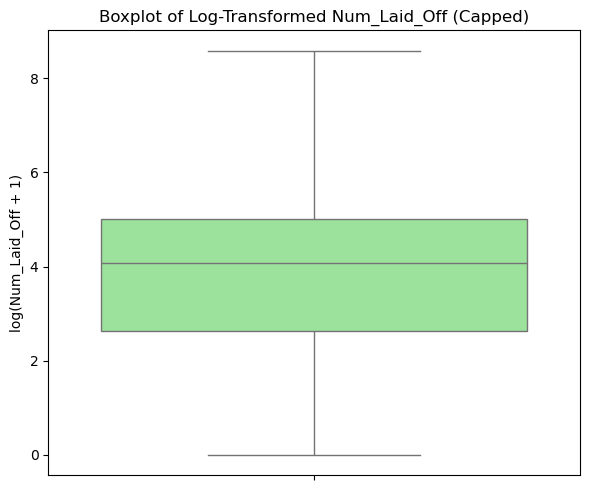

In [41]:
# Visualize capped data
plt.figure(figsize=(6, 5))
sns.boxplot(y=df['Num_Laid_Off'], color='lightgreen')
plt.title('Boxplot of Log-Transformed Num_Laid_Off (Capped)')
plt.ylabel('log(Num_Laid_Off + 1)')
plt.tight_layout()
plt.show()


In [42]:
# Remove '%' symbol and convert to float
df['Percent_Laid_Off'] = df['Percent_Laid_Off'].str.replace('%', '', regex=False)
df['Percent_Laid_Off'] = pd.to_numeric(df['Percent_Laid_Off'], errors='coerce')


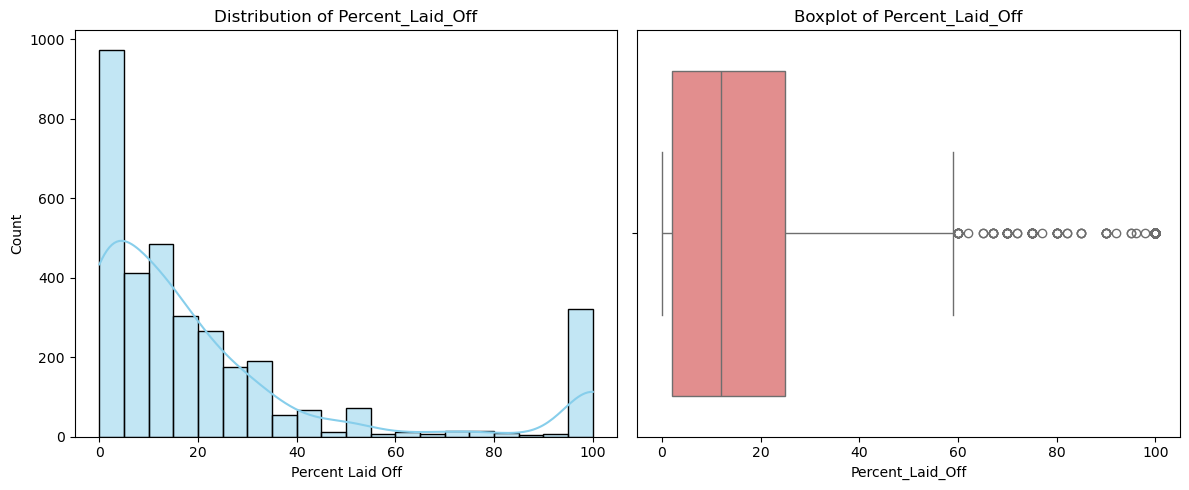

In [43]:
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Percent_Laid_Off'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Percent_Laid_Off')
plt.xlabel('Percent Laid Off')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Percent_Laid_Off'], color='lightcoral')
plt.title('Boxplot of Percent_Laid_Off')

plt.tight_layout()
plt.show()

the below code identifies and caps extreme values in the Percent_Laid_Off_Capped column using the Interquartile Range (IQR) method.
It replaces outliers (too high or too low) with the IQR boundaries to reduce skewness, handle outliers, and ensure robust statistical analysis without losing data points.

In [44]:
# Compute IQR bounds
Q1 = df['Percent_Laid_Off'].quantile(0.25)
Q3 = df['Percent_Laid_Off'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
df['Percent_Laid_Off'] = np.where(df['Percent_Laid_Off'] > upper_bound, upper_bound,
                                  np.where(df['Percent_Laid_Off'] < lower_bound, lower_bound,
                                           df['Percent_Laid_Off']))

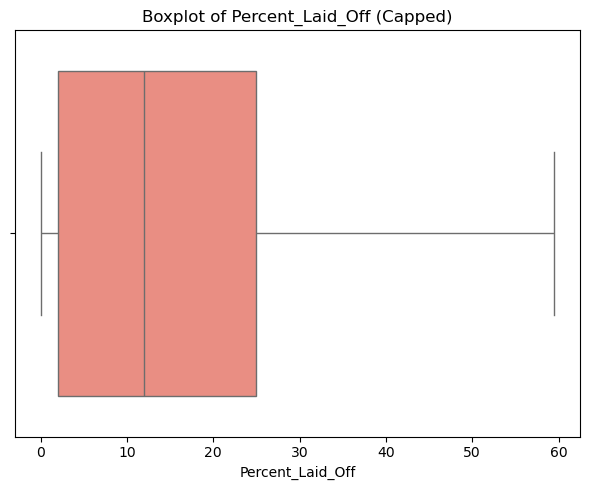

In [45]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='Percent_Laid_Off', data=df, color='salmon')
plt.title('Boxplot of Percent_Laid_Off (Capped)')
plt.xlabel('Percent_Laid_Off')
plt.tight_layout()
plt.show()

***EDA***

Univariate Analysis

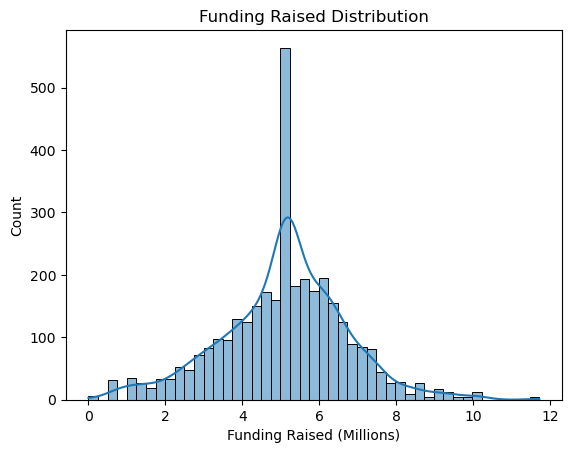

In [46]:
hist_plot = sns.histplot(df['Funding_Raised_Millions'], kde=True)
plt.title('Funding Raised Distribution')
plt.xlabel('Funding Raised (Millions)')
plt.ylabel('Count')
plt.show()

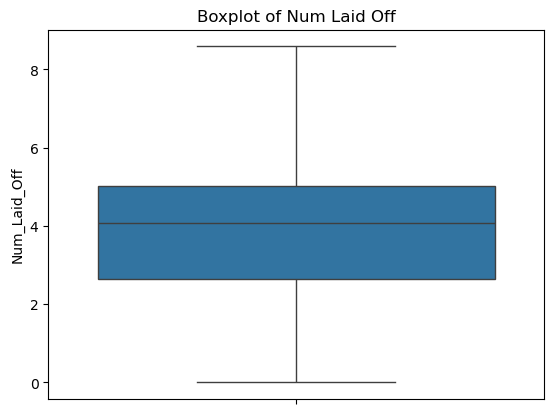

In [47]:
sns.boxplot(y=df['Num_Laid_Off'])
plt.title('Boxplot of Num Laid Off')
plt.show()

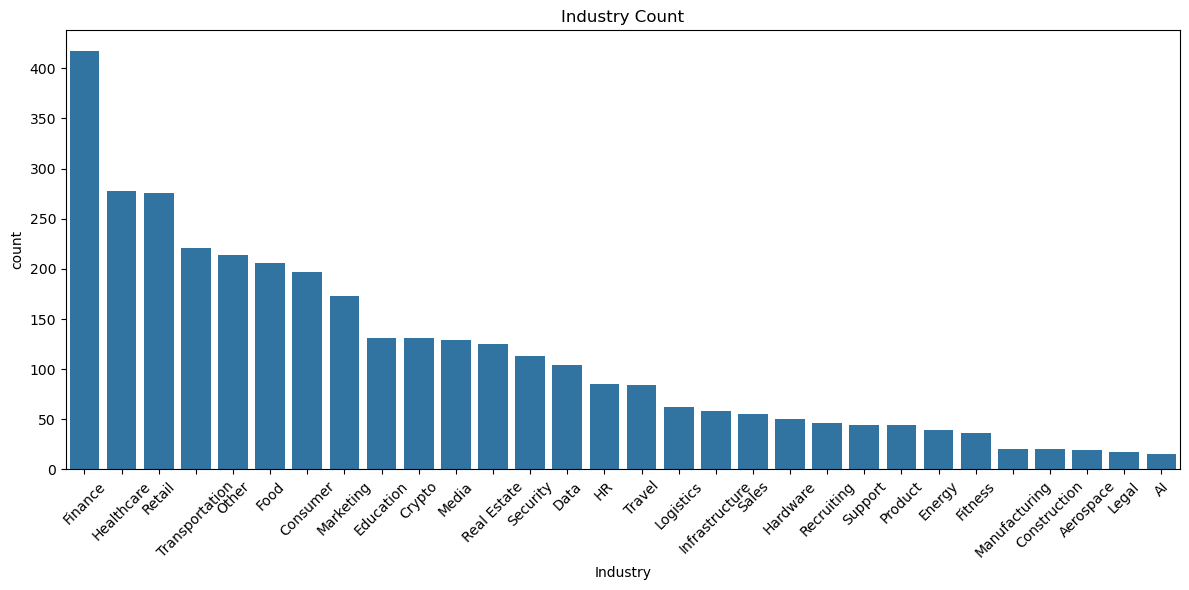

In [48]:
plt.figure(figsize=(12, 6))  # Increase figure size
sns.countplot(x='Industry', data=df, order=df['Industry'].value_counts().index)  # Sort bars
plt.title('Industry Count')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.tight_layout()
plt.show()


BIvariate Analysis

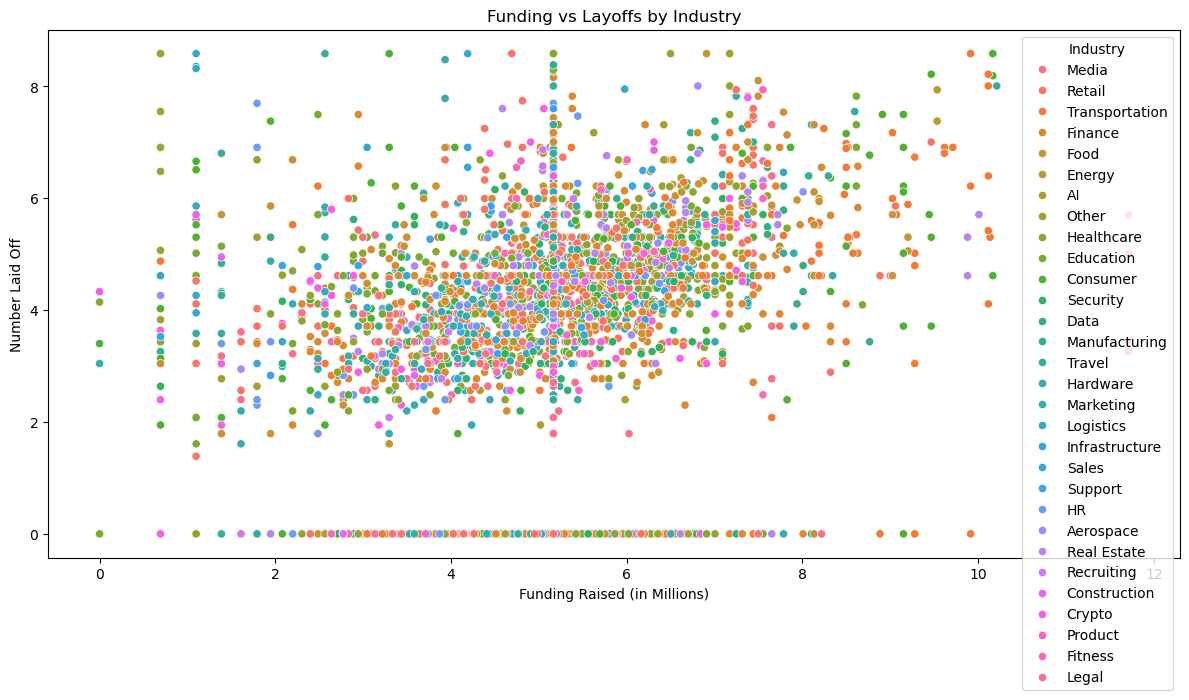

In [49]:
plt.figure(figsize=(12, 7))  # Set figure size (width, height)
sns.scatterplot(
    x='Funding_Raised_Millions',
    y='Num_Laid_Off',
    hue='Industry',
    data=df
)
plt.title('Funding vs Layoffs by Industry')
plt.xlabel('Funding Raised (in Millions)')
plt.ylabel('Number Laid Off')
plt.tight_layout()
plt.show()


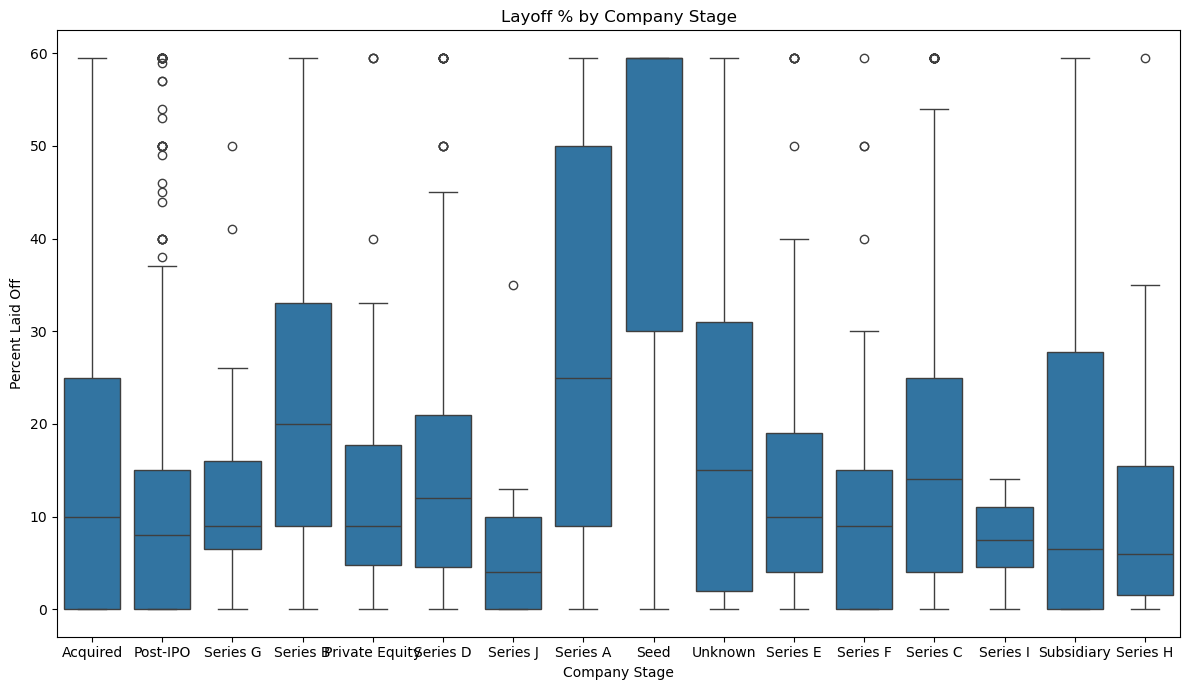

In [50]:
plt.figure(figsize=(12, 7))  # Increase figure size
sns.boxplot(x='Company_Stage', y='Percent_Laid_Off', data=df)
plt.title('Layoff % by Company Stage')
plt.xlabel('Company Stage')
plt.ylabel('Percent Laid Off')
plt.tight_layout()
plt.show()


This box plot visualizes the percentage of employees laid off ("Percent Laid Off") across different company stages, such as "Seed," "Series A," "Series B," up to "Post-IPO" and "Acquired." Here’s what the chart indicates:

Seed and Series A companies show the highest median and spread for layoff percentages. The "Seed" stage, in particular, displays the highest median and the widest range, with many companies laying off a large proportion of their workforce. This suggests early-stage startups are more vulnerable to large layoffs, likely due to unstable funding or business models.

Later-stage companies (Post-IPO, Acquired) and those with more advanced funding rounds (e.g., Series G, Series H) generally have lower median layoff percentages and tighter interquartile ranges. This implies more stability and possibly better access to resources to weather downturns.

There are many outliers across all stages, indicating that layoffs can be highly variable, but outliers are especially frequent in the earlier stages.

"Unknown" stage companies also show a wide range of layoff percentages, reflecting uncertainty or diversity in company circumstances.

Overall, the risk of large layoffs appears to decrease as companies mature and move through successive funding rounds.

In summary, the plot suggests that earlier-stage companies are at greater risk for high-percentage layoffs, while more mature companies tend to have lower and less variable layoff rates.

Multivariate Analysis

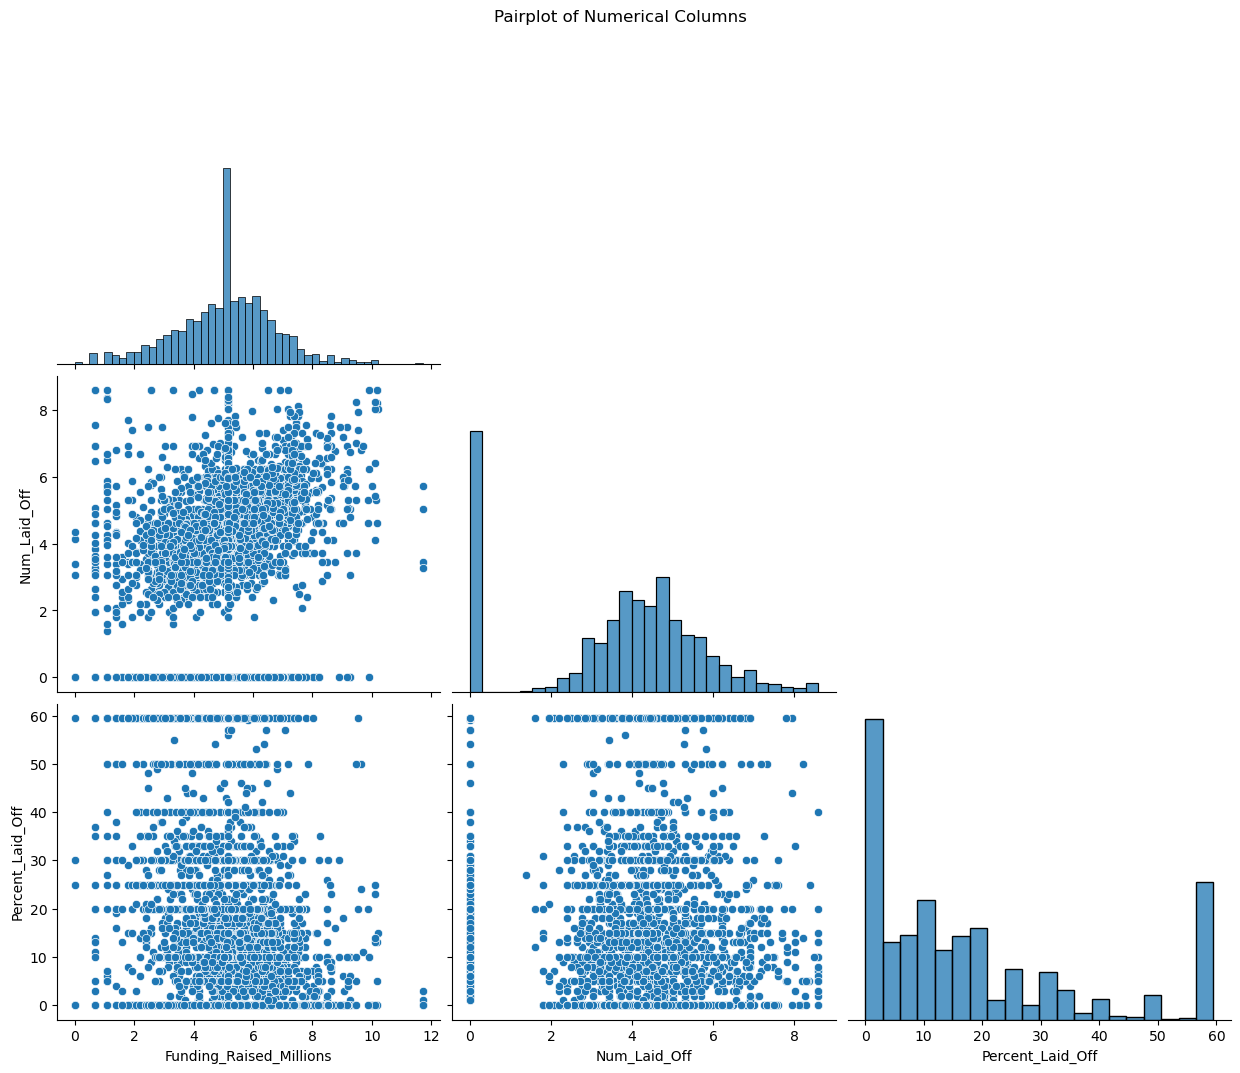

In [51]:
sns.pairplot(
    df[['Funding_Raised_Millions', 'Num_Laid_Off', 'Percent_Laid_Off']],
    corner=True,
    height=3.5,        # Height of each subplot (default is 2.5)
    aspect=1.2         # Width = height * aspect
)
plt.suptitle('Pairplot of Numerical Columns', y=1.02)
plt.show()


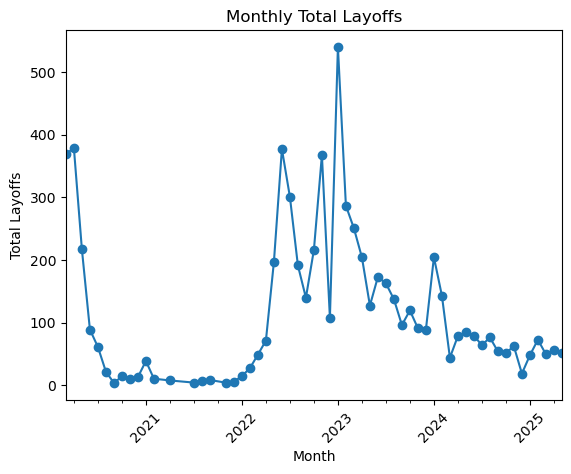

In [52]:
# 8. Time Series - Trend of layoffs
df['Month'] = df['Layoff_Date'].dt.to_period('M')
monthly_layoffs = df.groupby('Month')['Num_Laid_Off'].sum()
monthly_layoffs.plot(title='Monthly Total Layoffs', marker='o')
plt.ylabel('Total Layoffs')
plt.xticks(rotation=45)
plt.show()

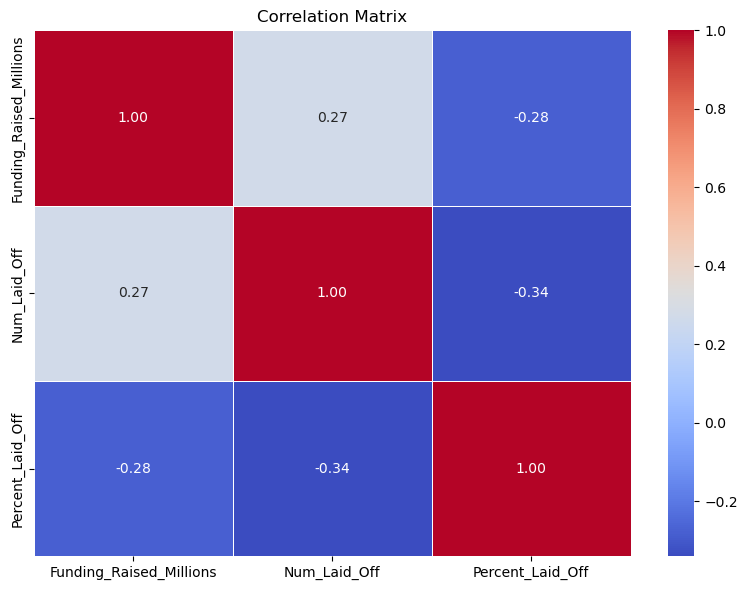

In [53]:
# Select relevant numerical columns
corr_df = df[['Funding_Raised_Millions', 'Num_Laid_Off', 'Percent_Laid_Off']]

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))  # Adjust size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()



***FEATURE ENGINEERING***


In [54]:
# Function to categorize funding amounts this function categorizes funding amounts into "High", "Medium", and "Low" based on predefined thresholds.
def categorize_funding(amount):
    if amount > 100:
        return "High"
    elif amount > 20:
        return "Medium"
    else:
        return "Low"

df['Funding Category'] = df['Funding_Raised_Millions'].apply(categorize_funding)

In [55]:

df.to_excel('cleaned_data.xlsx', index=False)

print("File saved as cleaned_data.xlsx")


File saved as cleaned_data.xlsx


In [56]:
df.head()

,Company,HQ_Location,Layoff_Date,Percent_Laid_Off,Industry,Source,Company_Stage,Country,Funding_Raised_Millions,Num_Laid_Off,Month,Funding Category
0,Business Insider,New York City,2025-05-29,20.0,Media,https://www.adweek.com/media/business-insider-...,Acquired,United States,4.043051,0.000000,2025-05,Low
1,eBay,"Tel Aviv,Non-U.S.",2025-05-28,0.0,Retail,https://www.calcalistech.com/ctechnews/article...,Post-IPO,Israel,7.090910,5.303305,2025-05,Low
2,Cars24,"Gurugram,Non-U.S.",2025-05-27,0.0,Transportation,https://inc42.com/buzz/cars24-to-fire-120-more...,Series G,India,7.170888,4.795791,2025-05,Low
3,nCino,Wilmington,2025-05-27,7.0,Finance,https://www.housingwire.com/articles/ncino-wor...,Post-IPO,United States,7.003974,0.000000,2025-05,Low
4,Otipy,"New Delhi,Non-U.S.",2025-05-23,59.5,Food,https://economictimes.indiatimes.com/tech/star...,Series B,India,3.806662,5.707110,2025-05,Low


In [57]:
df.isnull().sum()

Company                       0
HQ_Location                   0
Layoff_Date                1467
Percent_Laid_Off              0
Industry                      0
Source                        0
Company_Stage                 0
Country                       0
Funding_Raised_Millions       0
Num_Laid_Off                  0
Month                      1467
Funding Category              0
dtype: int64